## Семинар 2

Всем привет и добро пожаловать на наш семинар по сбору новостей. Сегодня мы ставим себе следующие цели:

1. Собрать все заголовки статей на определенную тему, отфильтровав по дате с сайта делового издания "Коммерсант"
2. Узнать про хитрости, которые могут помочь в сборе данных
3. Провести самостоятельную практику с похожими заданиями

Для этого мы воспользуемся уже знакомыми Вам библиотеками requests и BeautifulSoup, а также познакомимся с новой – Selenium.


## Забираем заголовки с Коммерсанта

In [1]:
import requests
from bs4 import BeautifulSoup

Итак, начнем с простого – проверим, соберется ли у нас информация с главной страницы Коммерсанта или нужно искать специальные примочки.

In [4]:
url = 'https://www.kommersant.ru/'
response = requests.get(url)
response

<Response [200]>

`<Response [200]>` выглядит хорошо. Но имейте в виду – это не всегда значит, что мы получили нужную информацию. Например, когда я пишу этот семинар, главная страница выглядит так:


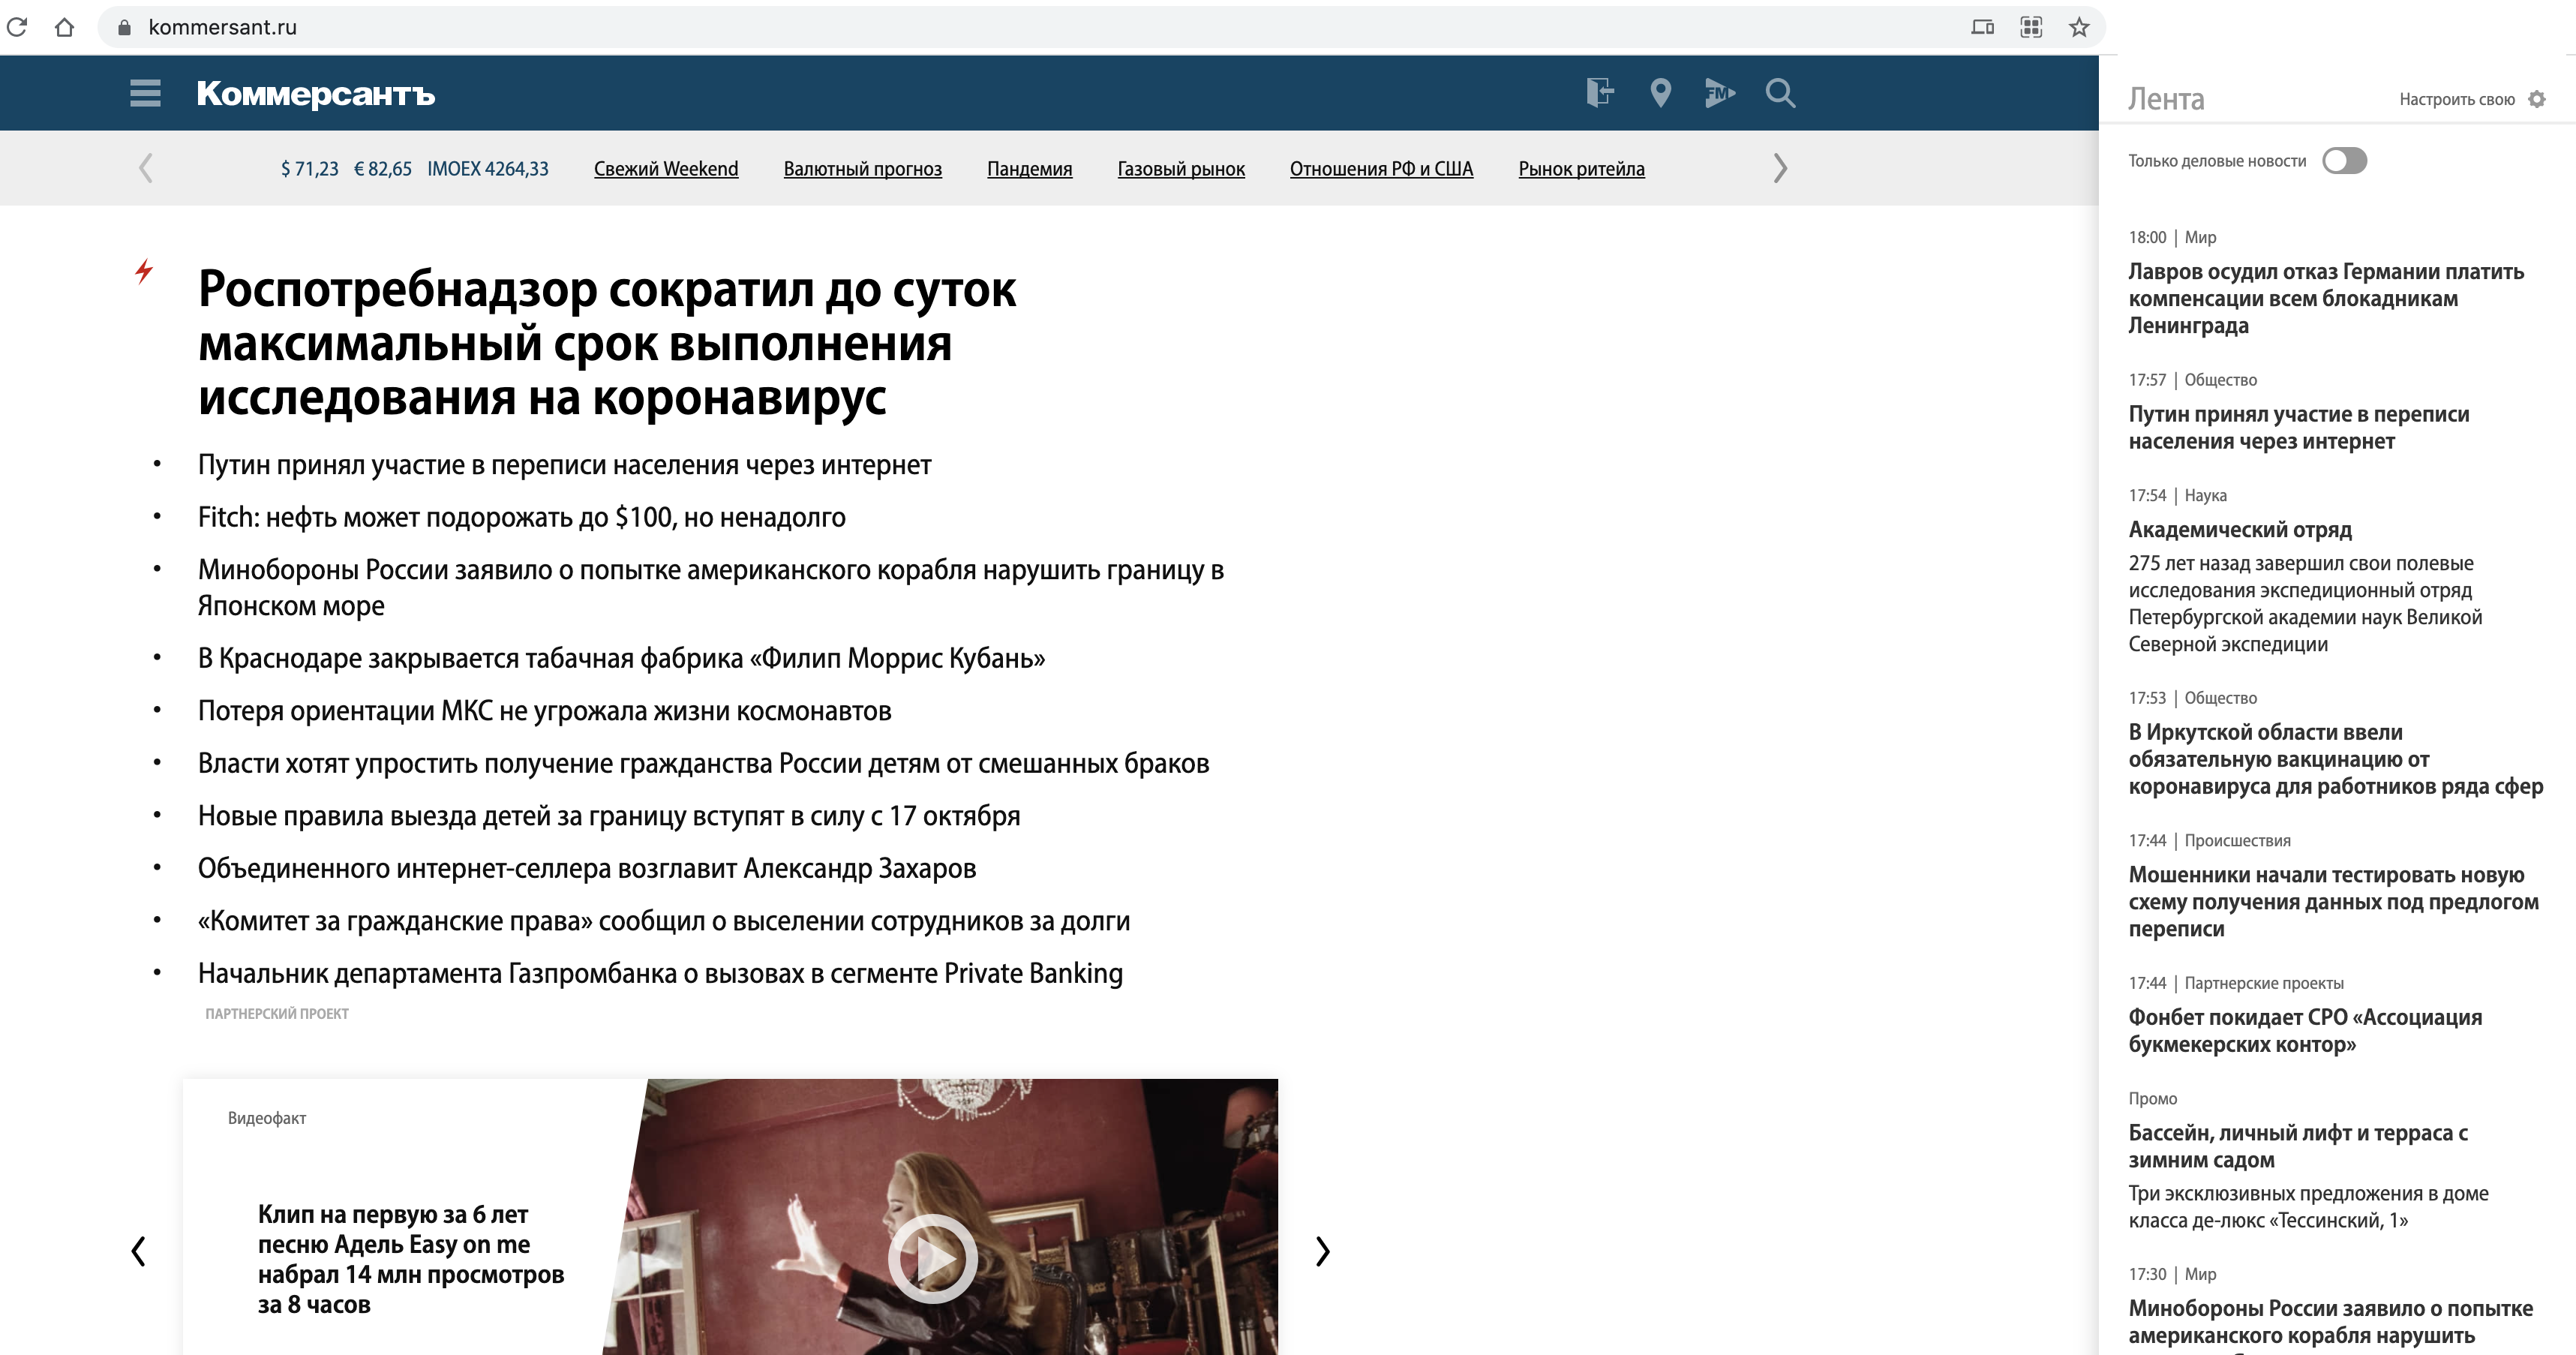

Однако, если бы нам вылетел баннер (например, какое-нибудь предложение о скидке) или запрос в духе "уточните Ваше местоположение", или капча, то некоторый нужный текст с главной страницы в собранный html мог бы не попасть. Для этого можно либо глазами посмотреть на `response.content` или попробовать найти нужный элемент с помощью методов `.find()` (находит первый элемент, отвечающий условиям в скобочках) или `.find_all()` (находит все нужные элементы) из библиотеки `bs4`.

Сделаем деревце, по которому можно искать нужные элементы с помощью `bs4`:

In [7]:
tree = BeautifulSoup(response.content, 'html.parser')

Найдем главную новость в тексте. Для этого я перехожу на сайт Коммерсанта, навожу мышкой на заголовок "Роспотребнадзор сократил до суток максимальный срок выполнения исследования на коронавирус", щелкаю правой кнопкой мыши и нажимаю "Просмотреть код элемента". Вижу что-то такое:

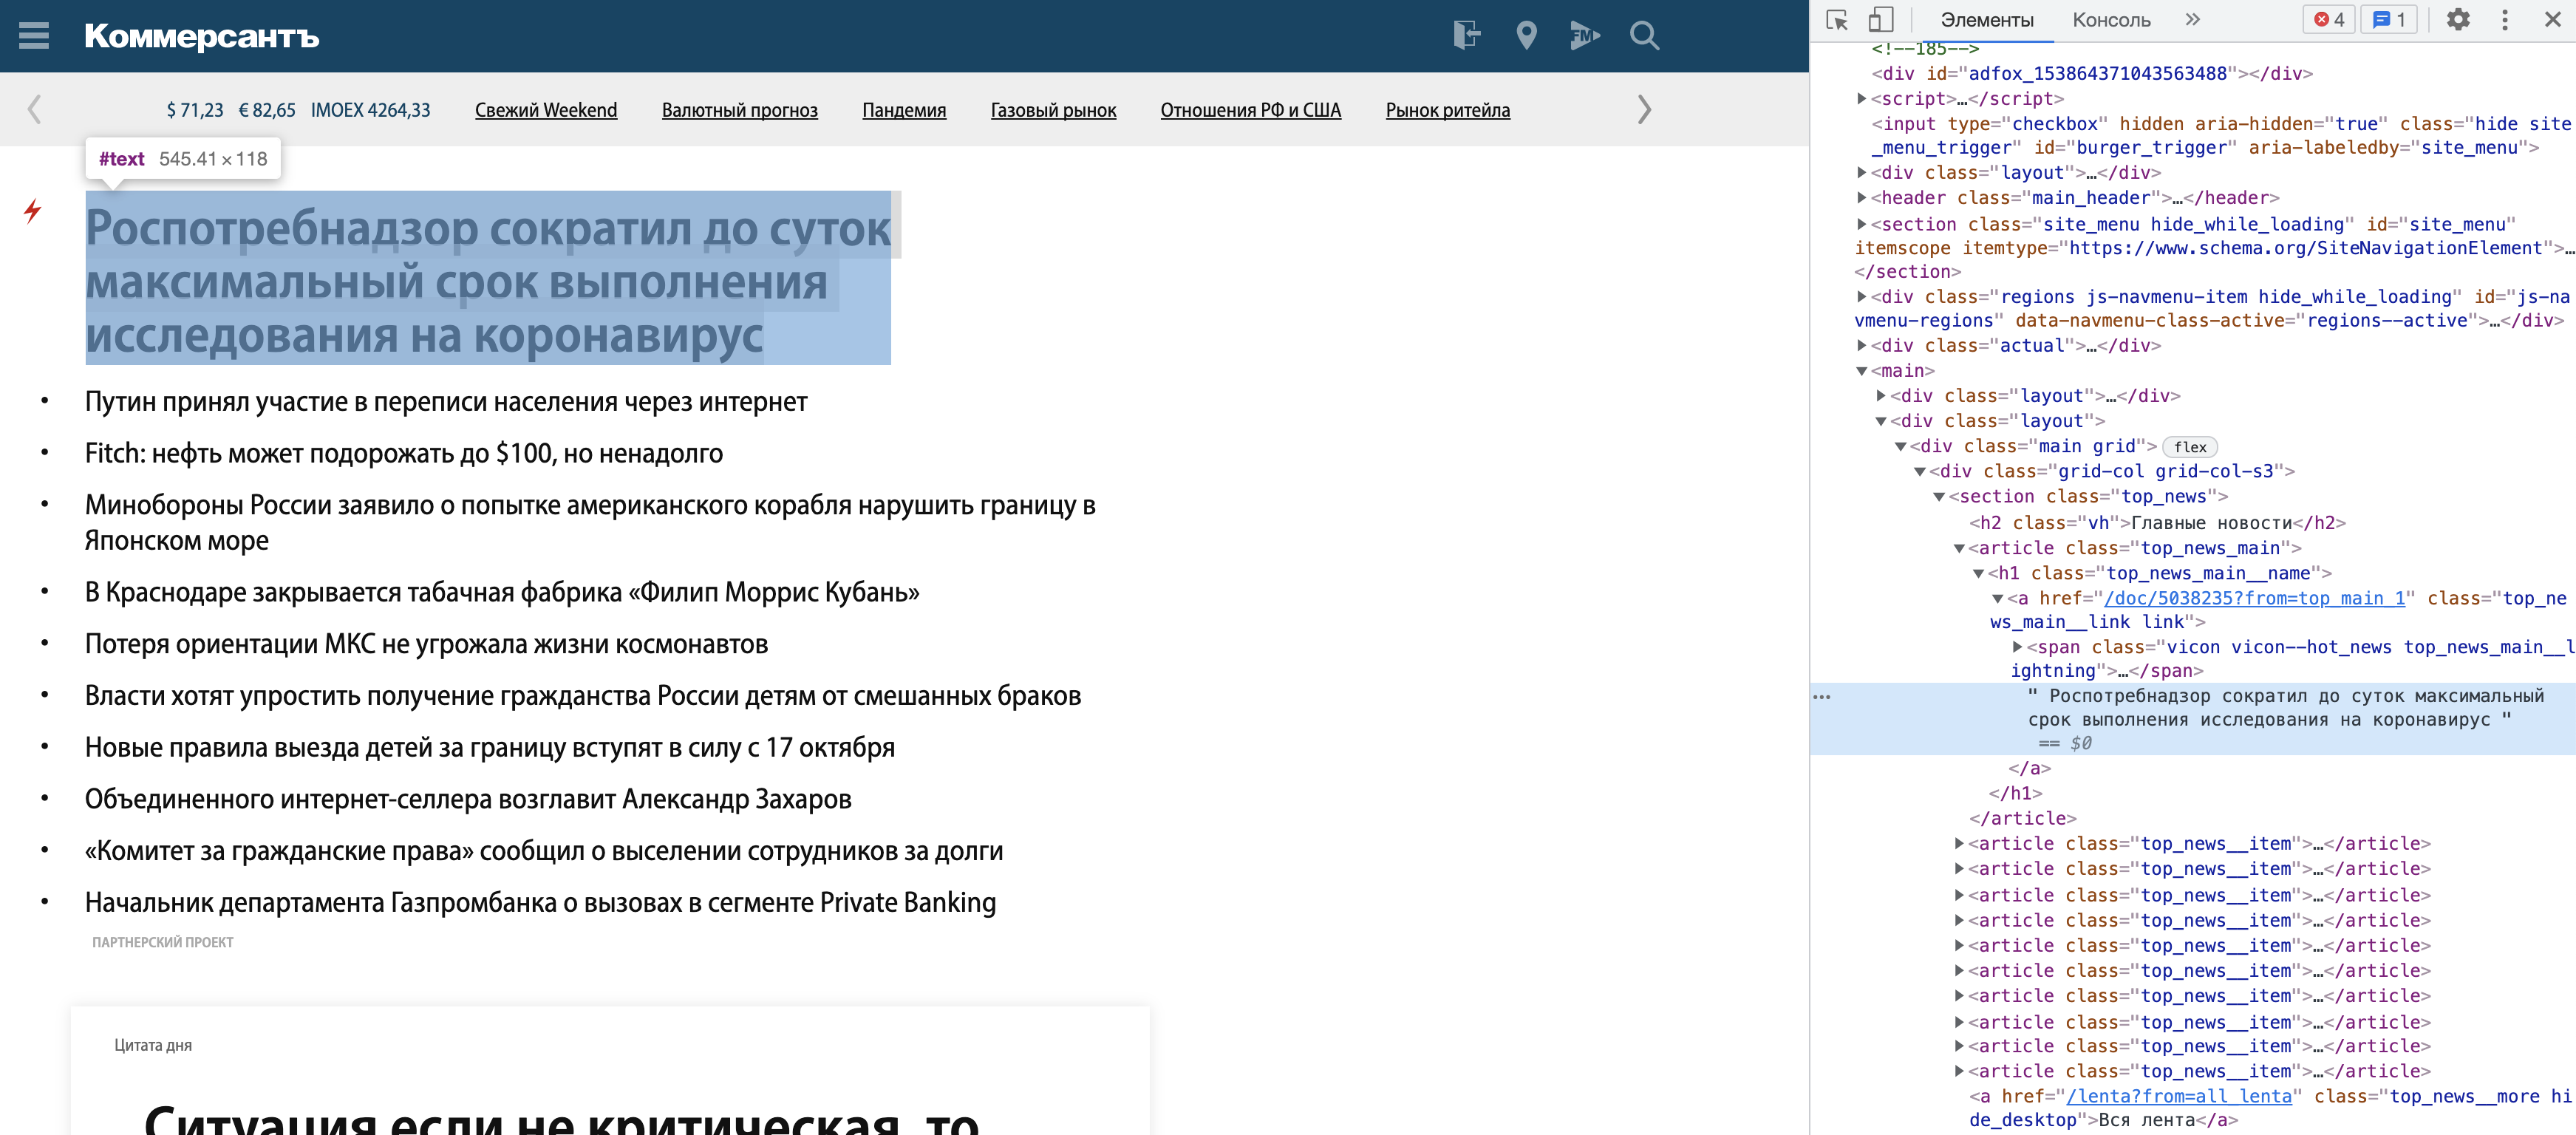

Попробуем найти этот элемент в нашем дереве!

In [9]:
tree.find_all('a', {'class': 'top_news_main__link link'})

[<a class="top_news_main__link link" href="/doc/6821575?from=top_main_1">
 <span class="vicon vicon--hot_news top_news_main__lightning">
 <svg class="vicon__body"><use xlink:href="#vicon-hot_news" xmlns:xlink="http://www.w3.org/1999/xlink"></use></svg>
 </span>
                     Госдума приняла закон об изменении налоговой системы
                 </a>]

Достанем только текст:

In [11]:
tree.find('a', {'class': 'top_news_main__link link'}).text.strip()

'Госдума приняла закон об изменении налоговой системы'

Однако, если Вы впервые заходите на сайт или откроете окно в режиме инкогните, то увидите, что при первом визите на сайт вылетает такой баннер:

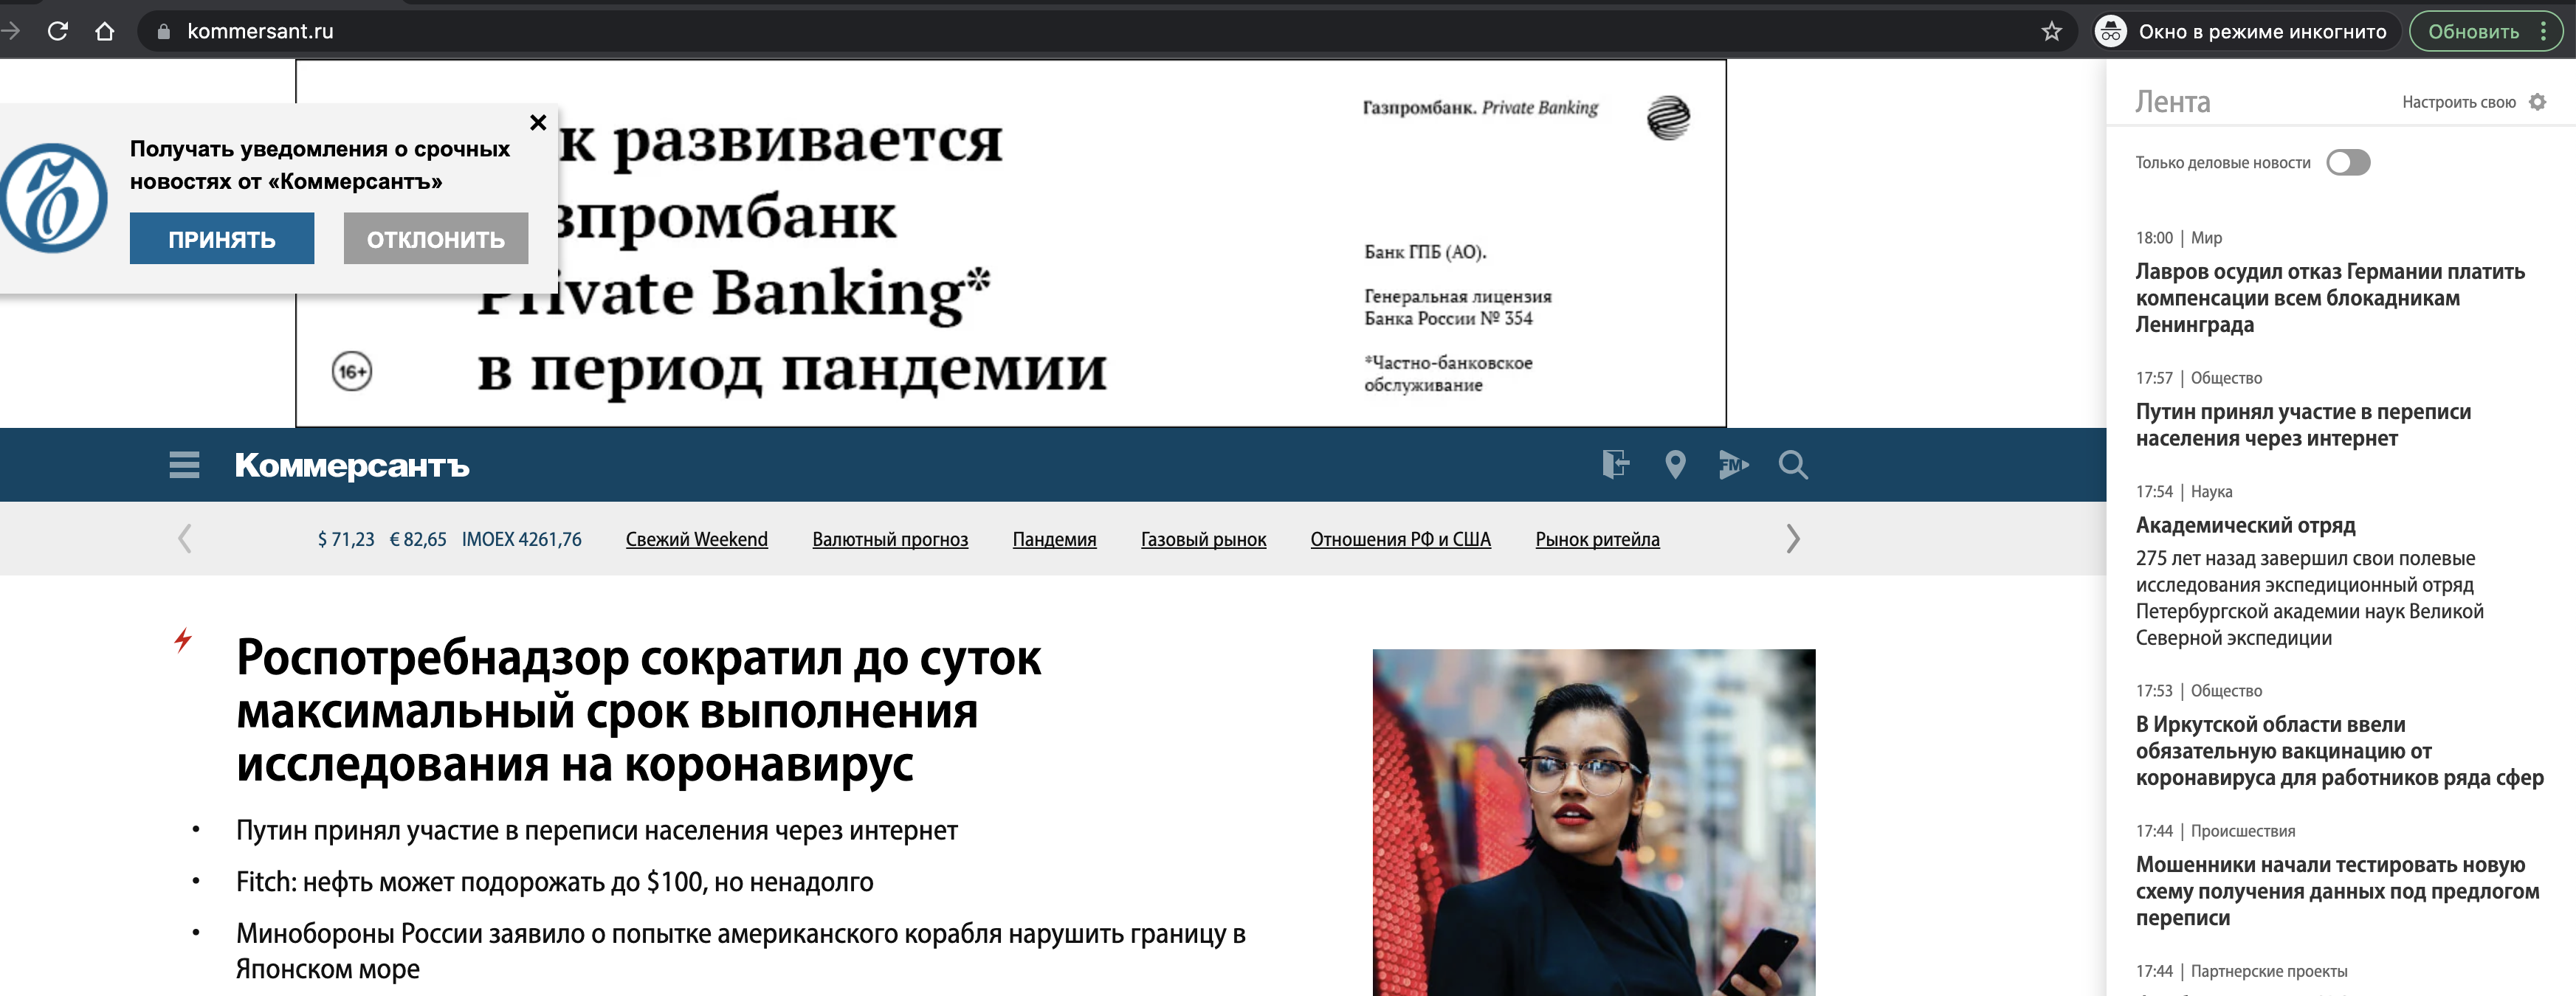

Также это можно заметить, полистав содержимое `tree`.

Конкретно в этом примере нам это не мешает вытащить заголовок. Однако, иногда такие всплывающие окна мешют собрать html с нужной информацией со страницы. Что же делать? Нам на помощь придет библиотека selenium – специальный инструмент для автоматизации действий браузера.

### Добавляем селениум :)

Библиотека `selenium` – набор инструментов для интерактивной работы в браузере средствами Python. Вообще Selenium ‒ это целый проект, в котором есть разные инструменты. Мы рассмотрим один из самых распространенных ‒ Selenium WebDriver, модуль, который позволяется Python встраиваться в браузер и работать в нем как пользователь: кликать на ссылки и кнопки, заполнять формы, выбирать опции в меню и прочее.

In [51]:
# через восклицательный знак обращемся к командной строке (на маке называется terminal)
# pip – менеджер пакетов для питона, который позволяет нам поставить библиотеку
!pip install selenium

In [52]:
!pip install webdriver-manager

Для того, чтобы воспользоваться библиотекой, нужно загрузить вебдрайвер для Вашего браузера. Подробнее можно почитать [в пункте 1.5 документации про установку](https://selenium-python.readthedocs.io/installation.html). План действий такой: качате драйвер – прописываете путь в переменной PATH – используете.

Но мы воспользуемся лайфхаком, чтобы не мучиться долго с установкой. Это библиотека `webdriver-manager`, которая скачает вебдрайвер за Вас. Подробнее в [документации](https://pypi.org/project/webdriver-manager/) (там же можно посмотреть код для других браузеров).

In [54]:
from selenium.webdriver.common.keys import Keys

In [58]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

AttributeError: 'str' object has no attribute 'capabilities'

In [60]:
from selenium import webdriver

driver = webdriver.Chrome()

На Вашем компьютере откроется пустая страничка. Давайте перейдем на сайт Коммерсанта.

In [72]:
driver.get('https://www.kommersant.ru/')

Откройте эту страничку – теперь она не пустая :)

Следующим шагом, нам надо понять, как кликнуть на баннер так, чтобы он закрылся. Для этого нужно определить пусть к кнопке. Как и раньше, наводим мышку и кликаем "Просмотреть код".

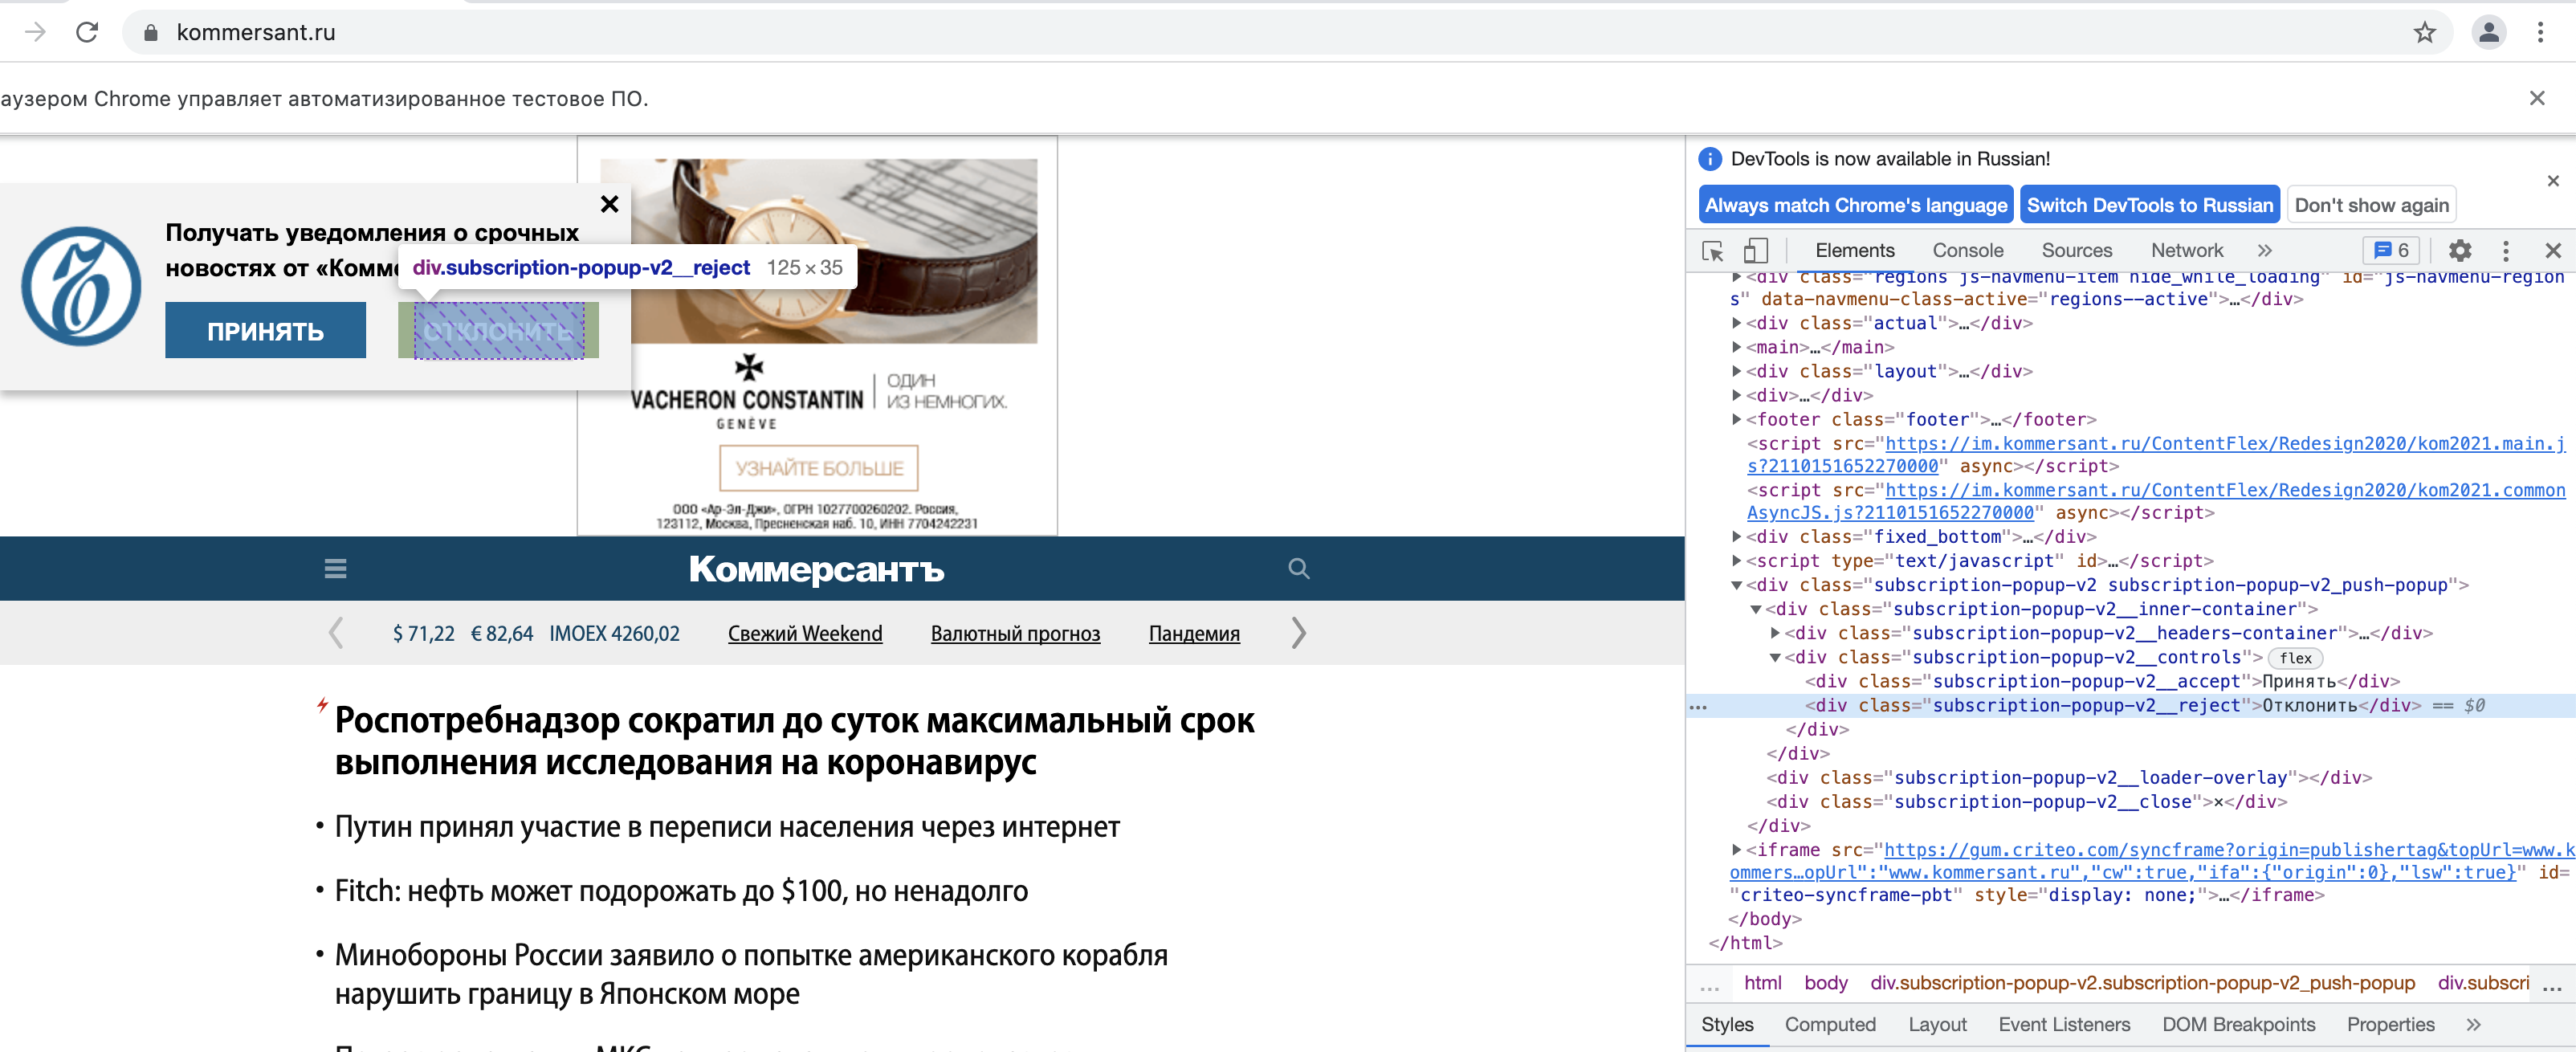

Теперь нужно сделать 2 действия кодом:

1. Помочь драйверу найти элемент
2. Кликнуть на него

Есть несколько способов указать пусть к элементу, они описаны [здесь](https://selenium-python.readthedocs.io/locating-elements.html) (попросите Вашего семинариста вкратце прокомментировать каждый).

Принципиальной разницы нам сейчас нет, предлагаю воспользоваться методом `driver.find_element_by_css_selector()`. Правой кнопокой мыши щелкните по коду нужной кнопки (принять или отклонить), выберите copy – copy selector.

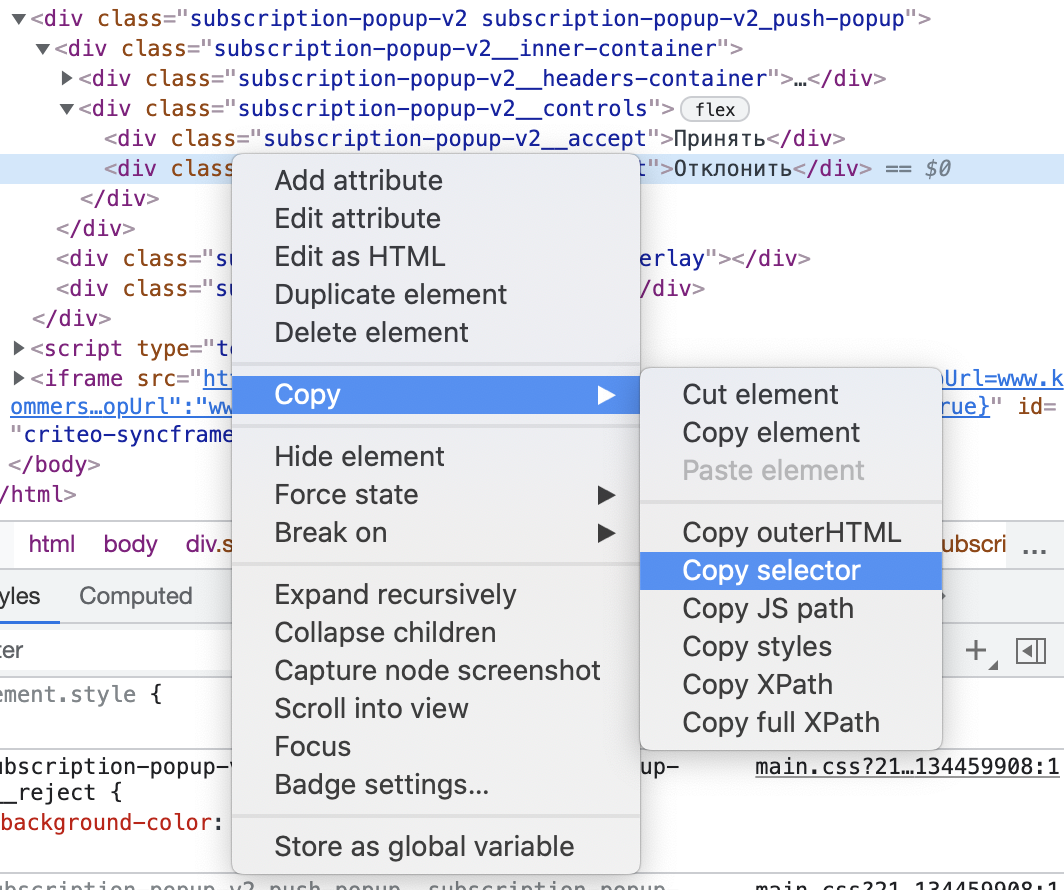

Сохраним селектор в переменную, найдем нужный элемент и кликнем. Иногда работает не с первого раза.

In [85]:
'body > div.subscription-popup-v2.subscription-popup-v2_push-popup > div.subscription-popup-v2__inner-container > div.subscription-popup-v2__controls > div.subscription-popup-v2__reject'

'body > div.subscription-popup-v2.subscription-popup-v2_push-popup > div.subscription-popup-v2__inner-container > div.subscription-popup-v2__controls > div.subscription-popup-v2__reject'

In [77]:
selector = "body > div.subscription-popup-v2.subscription-popup-v2_push-popup > div.subscription-popup-v2__inner-container > div.subscription-popup-v2__controls > div.subscription-popup-v2__reject"


In [78]:
from selenium.webdriver.common.by import By

In [79]:
ss = driver.find_element(By.CSS_SELECTOR, selector)

In [70]:
ss

<selenium.webdriver.remote.webelement.WebElement (session="b4abfe96647bfd116c12969e1f153c06", element="f.0F4BD15C728124AEEA3E0ED5D3A76AE0.d.1305B02F6F6343FEBA35EBFD714F1DD0.e.27")>

In [87]:
ss.click()

Обновим страничку на всякий случай:

In [90]:
driver.refresh()

Давайте найдем главный заголовок еще одним способом. Сначала найдем элемент, помня имя класса (см. скрины выше), потом достанем его html код.

In [93]:
'/html/body/main/div[2]/div/div[1]/section/article[1]/h1/a'

'/html/body/main/div[2]/div/div[1]/section/article[1]/h1/a'

In [95]:
main_news_path = '/html/body/main/div[2]/div/div[1]/section/article[1]/h1/a'
main_news = driver.find_element(By.XPATH, main_news_path)
main_news

<selenium.webdriver.remote.webelement.WebElement (session="16411e2b61b3ba2abcb3e81f18d540b7", element="f.EDD6A283E0AC160CE36C7458C9382968.d.9FAEB6E48549A11B34993DB81CCCBDB8.e.20")>

In [97]:
main_news.get_attribute('innerHTML')

'\n                    <span class="vicon vicon--hot_news top_news_main__lightning">\n                        <svg class="vicon__body"><use xmlns:xlink="http://www.w3.org/1999/xlink" xlink:href="#vicon-hot_news"></use></svg>\n                    </span>\n                    Минфин опубликовал новые условия семейной ипотеки\n                '

In [99]:
small_tree = BeautifulSoup(main_news.get_attribute('innerHTML'), 'html.parser')

In [101]:
small_tree


<span class="vicon vicon--hot_news top_news_main__lightning">
<svg class="vicon__body"><use xlink:href="#vicon-hot_news" xmlns:xlink="http://www.w3.org/1999/xlink"></use></svg>
</span>
                    Минфин опубликовал новые условия семейной ипотеки
                

In [105]:
small_tree.text.strip()

'Минфин опубликовал новые условия семейной ипотеки'

Ура, получили заголовок главной новости. Если он отличается от того, что на скрине, то нестрашно – новостные сайты быстро меняют статьи на главных страницах. Остальное можно достать по аналогии :)

Перейдем к более интересному – соберем все новости на определенную тему и срок.

Предлагаю попробовать собрать все новости, содержащие фразу "НИУ ВШЭ" за период за последний год. То есть, переводя это на программистский, нам нужно проделать следующие действия:

1. Найти окно поиска, кликнуть
2. Ввести в него ключевую фразу, нажать кнопку поиска
3. Нажать кнопку расширенный поиск
4. Найти кнопку, где изменяем дату начала поиска, выставить нужную нам
5. Собрать информацию

Давайте начнем :) В прошлый раз мы воспользовались поиском с помощью селектора `.find_element_by_css_selector()`. Теперь добавим немного разнообразия и сделаем поиском через XPath. Получить ее можно по старой схеме: наводим мышь на окно поиска – кликаем посмотреть код – правой кнопкой кликаем по мыши на выделенном коде – выбираем copy – copy xpath.   

По шагам:

1. наводим мышь на окно поиска – кликаем посмотреть код
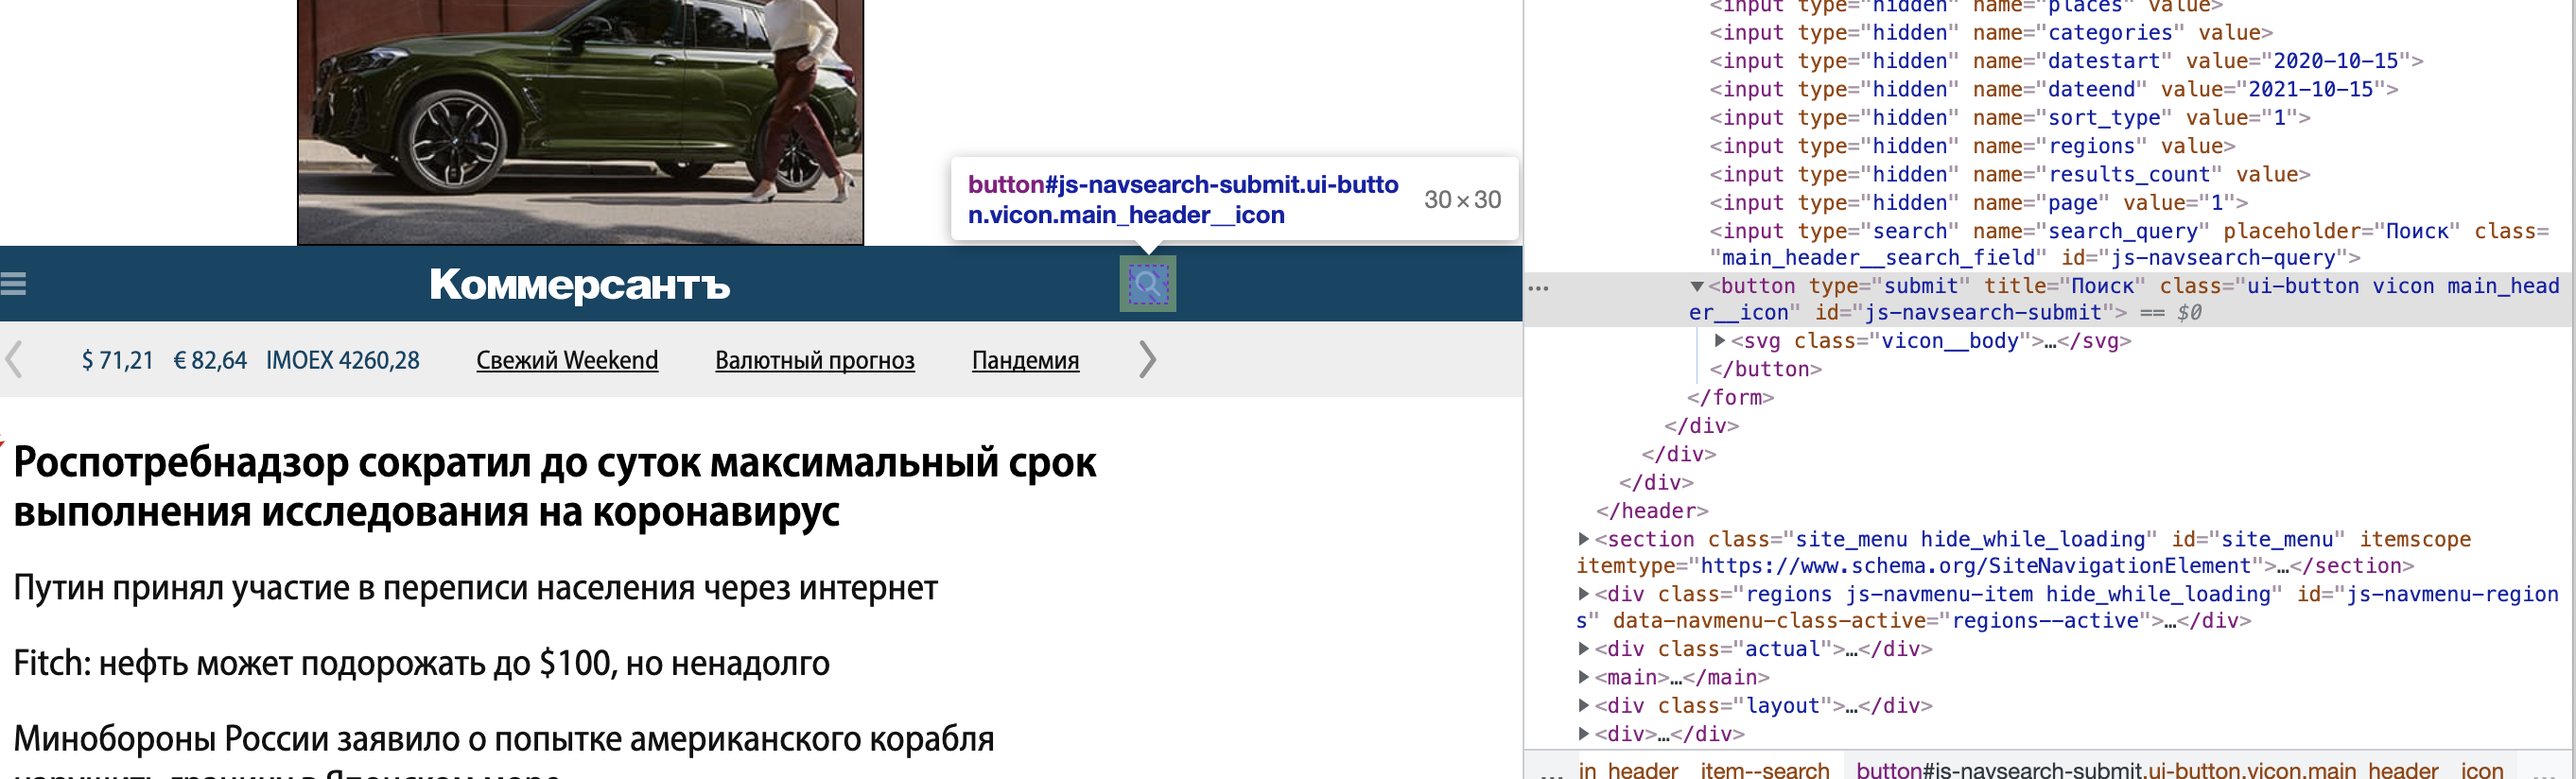

2. правой кнопкой мыши кликаем на выделенном коде – выбираем copy – copy xpath   
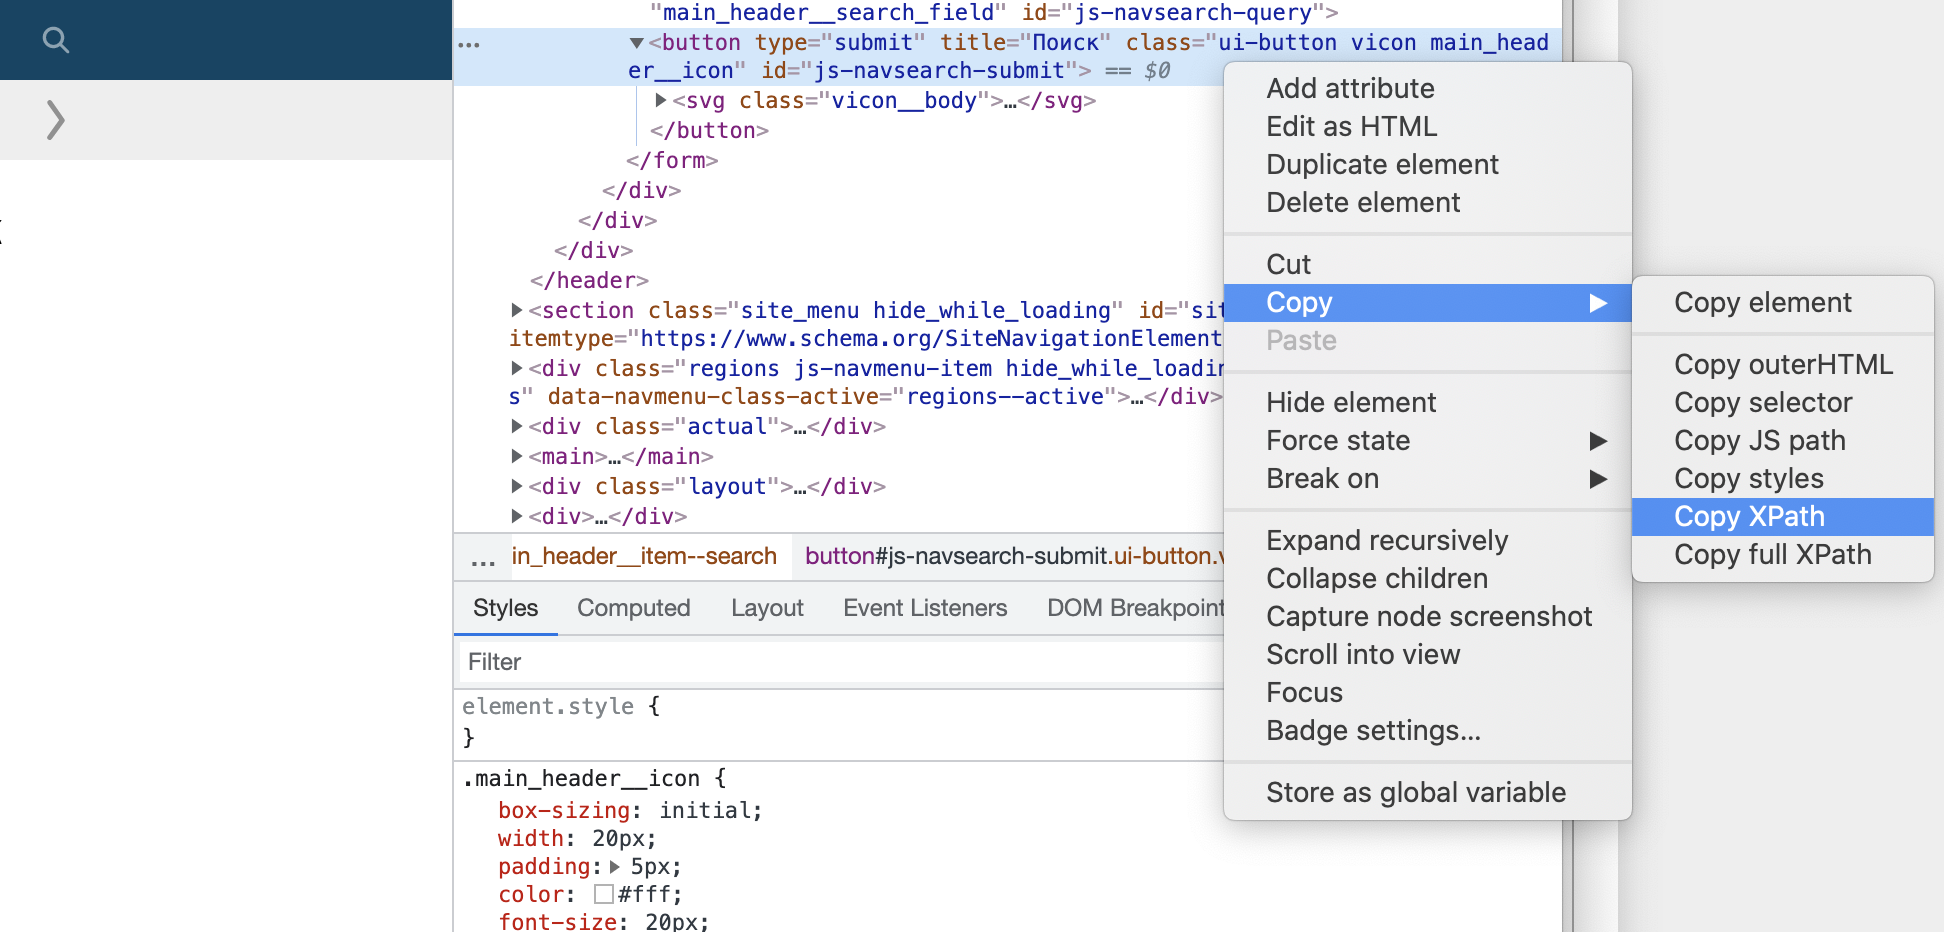

In [110]:
"Гарик "Бульдог" Харламов"

SyntaxError: invalid syntax (2489572296.py, line 1)

In [112]:
"Гарик \"Бульдог\" Харламов"

'Гарик "Бульдог" Харламов'

In [114]:
a = 'a'
a1 = "aa"
a2 = '''a
a
a
a'''

In [116]:
'Гарик "Бульдог" Харламов'

'Гарик "Бульдог" Харламов'

In [118]:
'//*[@id="js-navsearch-submit"]'

'//*[@id="js-navsearch-submit"]'

In [120]:
# найденный по инструкции выше xpath к лупе
xpath_query = '//*[@id="js-navsearch-submit"]'
# находим окно поиска
search = driver.find_element(By.ID, 'js-navsearch-submit')
# кликаем на него
search.click()

In [122]:
search_term = " НИУ ВШЭ"
# печатаем фразу для поиска в окне для поиска
search.send_keys(search_term)

In [124]:
# нажимаем кнопку enter
search.send_keys(Keys.RETURN)

Если Вы посмотрите, что происходит в окне браузера, которым управляет селениум, то увидите, что окно поменялось и мы теперь в разделе поиска :)

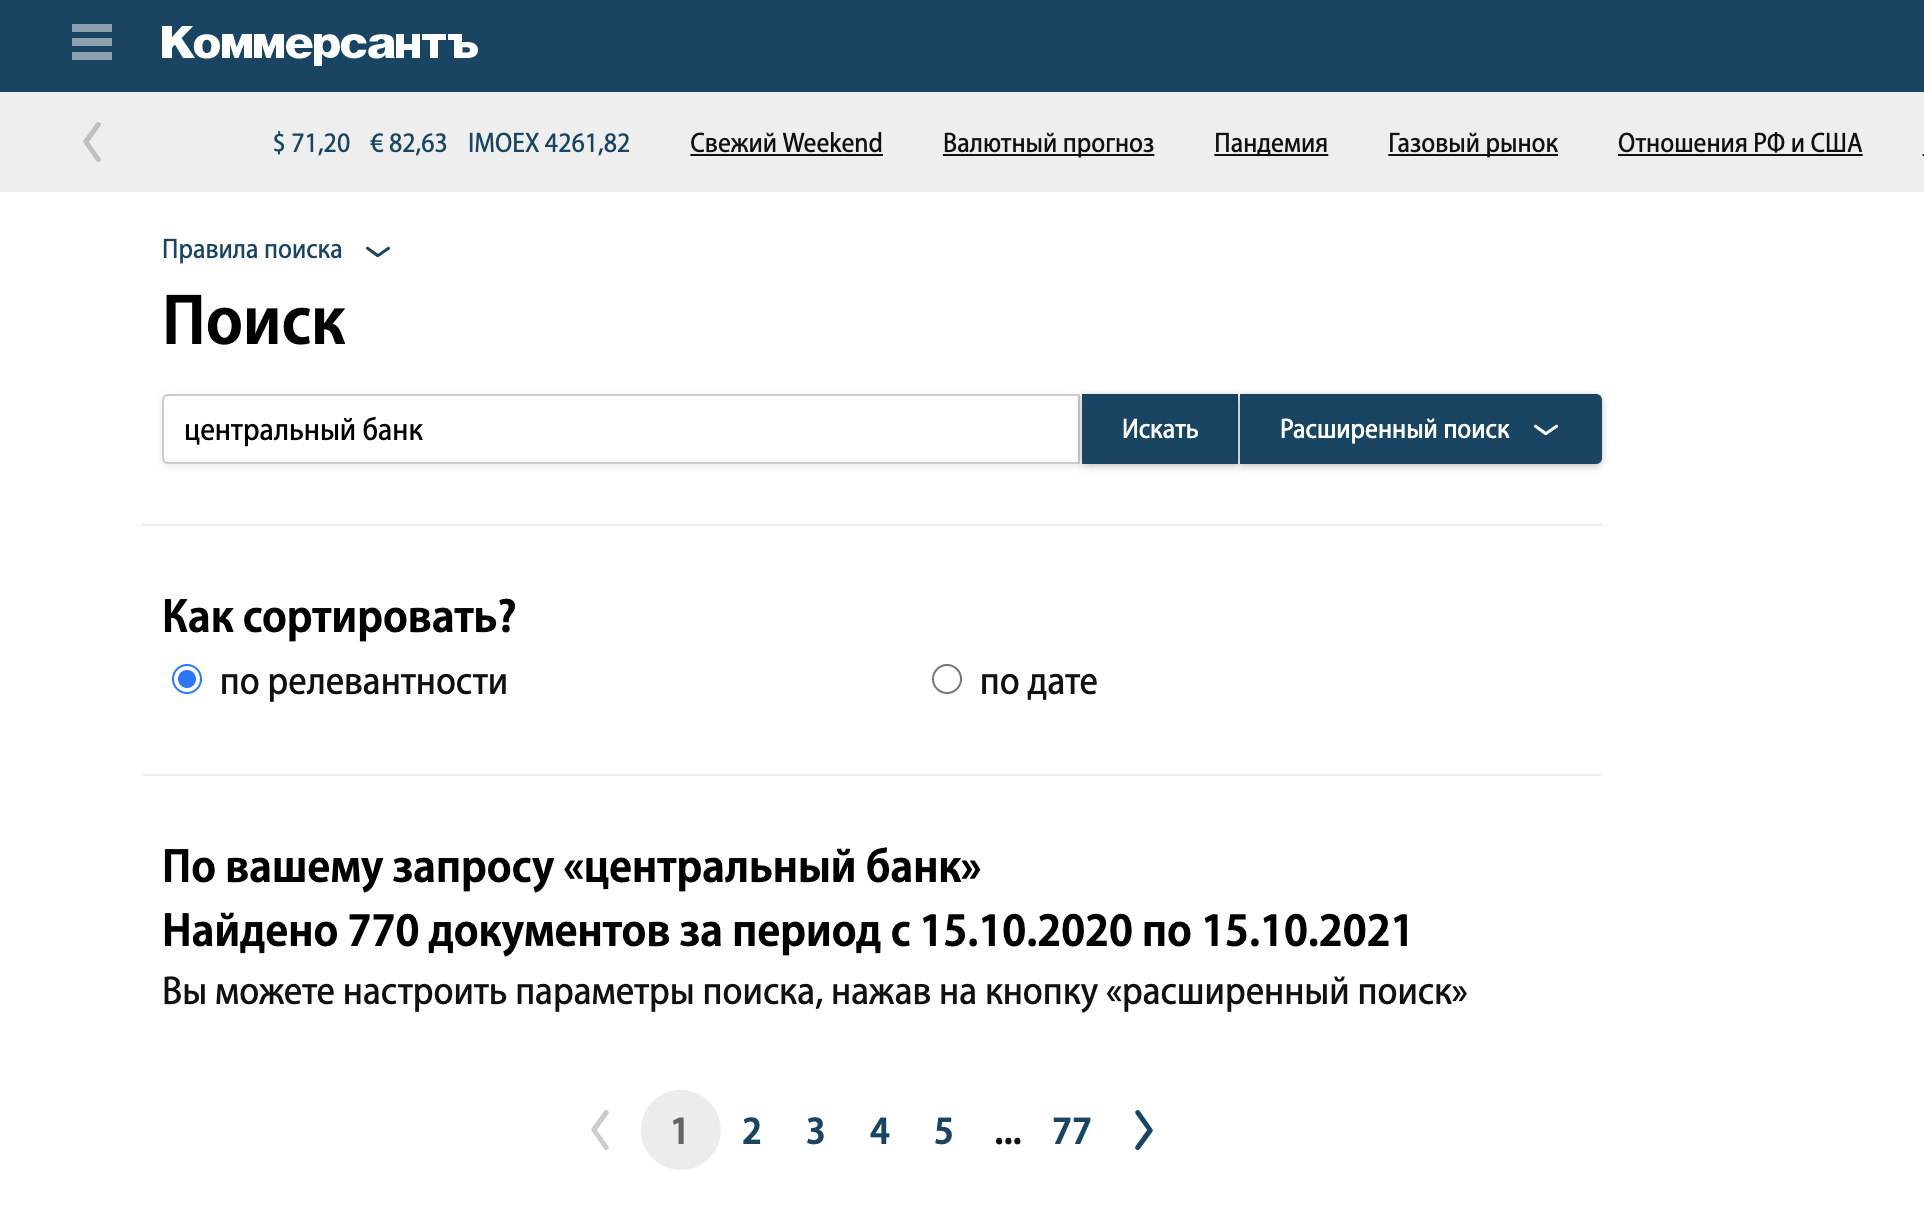

Нажимаем на кнопку расширенный поиск и выбираем дату.

Дальше мы все уже знаем. Откройте в соседней с ноутбуком вкладке сайт коммерсанта и доставайте оттуда нужные селекторы / xpath (неважно).

In [127]:
'body > main > div > div > section > div.grid-col.grid-col-s3 > form > div.ui-field_pack > label'

'body > main > div > div > section > div.grid-col.grid-col-s3 > form > div.ui-field_pack > label'

In [128]:
# находим селектор для кнопки расширенный поиск и нажимаем ее
selector2 = "body > main > div > div > section > div.grid-col.grid-col-s3 > form > div.ui-field_pack > label"

In [132]:
ext_search = driver.find_element(By.CSS_SELECTOR, selector2)

In [134]:
ext_search.click()

In [136]:
'body > main > div > div > section > div.grid-col.grid-col-s3 > form > div.ui-collapse.js-toggle-collapse.js-toggle-item.ui-collapse--show > section.simple_page_section.simple_page_section--form.js-search-settings > div.grid.ui-collapse.js-toggle-collapse.js-toggle-item.ui-collapse--show > div:nth-child(1) > div > input'

'body > main > div > div > section > div.grid-col.grid-col-s3 > form > div.ui-collapse.js-toggle-collapse.js-toggle-item.ui-collapse--show > section.simple_page_section.simple_page_section--form.js-search-settings > div.grid.ui-collapse.js-toggle-collapse.js-toggle-item.ui-collapse--show > div:nth-child(1) > div > input'

In [138]:
# находим селектор для поля ввода даты
selector3 = "body > main > div > div > section > div.grid-col.grid-col-s3 > form > div.ui-collapse.js-toggle-collapse.js-toggle-item.ui-collapse--show > section.simple_page_section.simple_page_section--form.js-search-settings > div.grid.ui-collapse.js-toggle-collapse.js-toggle-item.ui-collapse--show > div:nth-child(1) > div > input"


In [147]:
date = driver.find_element(By.CSS_SELECTOR, selector3)

Обратите внимание на картинку ниже – дата начала поиска по дефолту вбита в окошко, надо ее удалить.

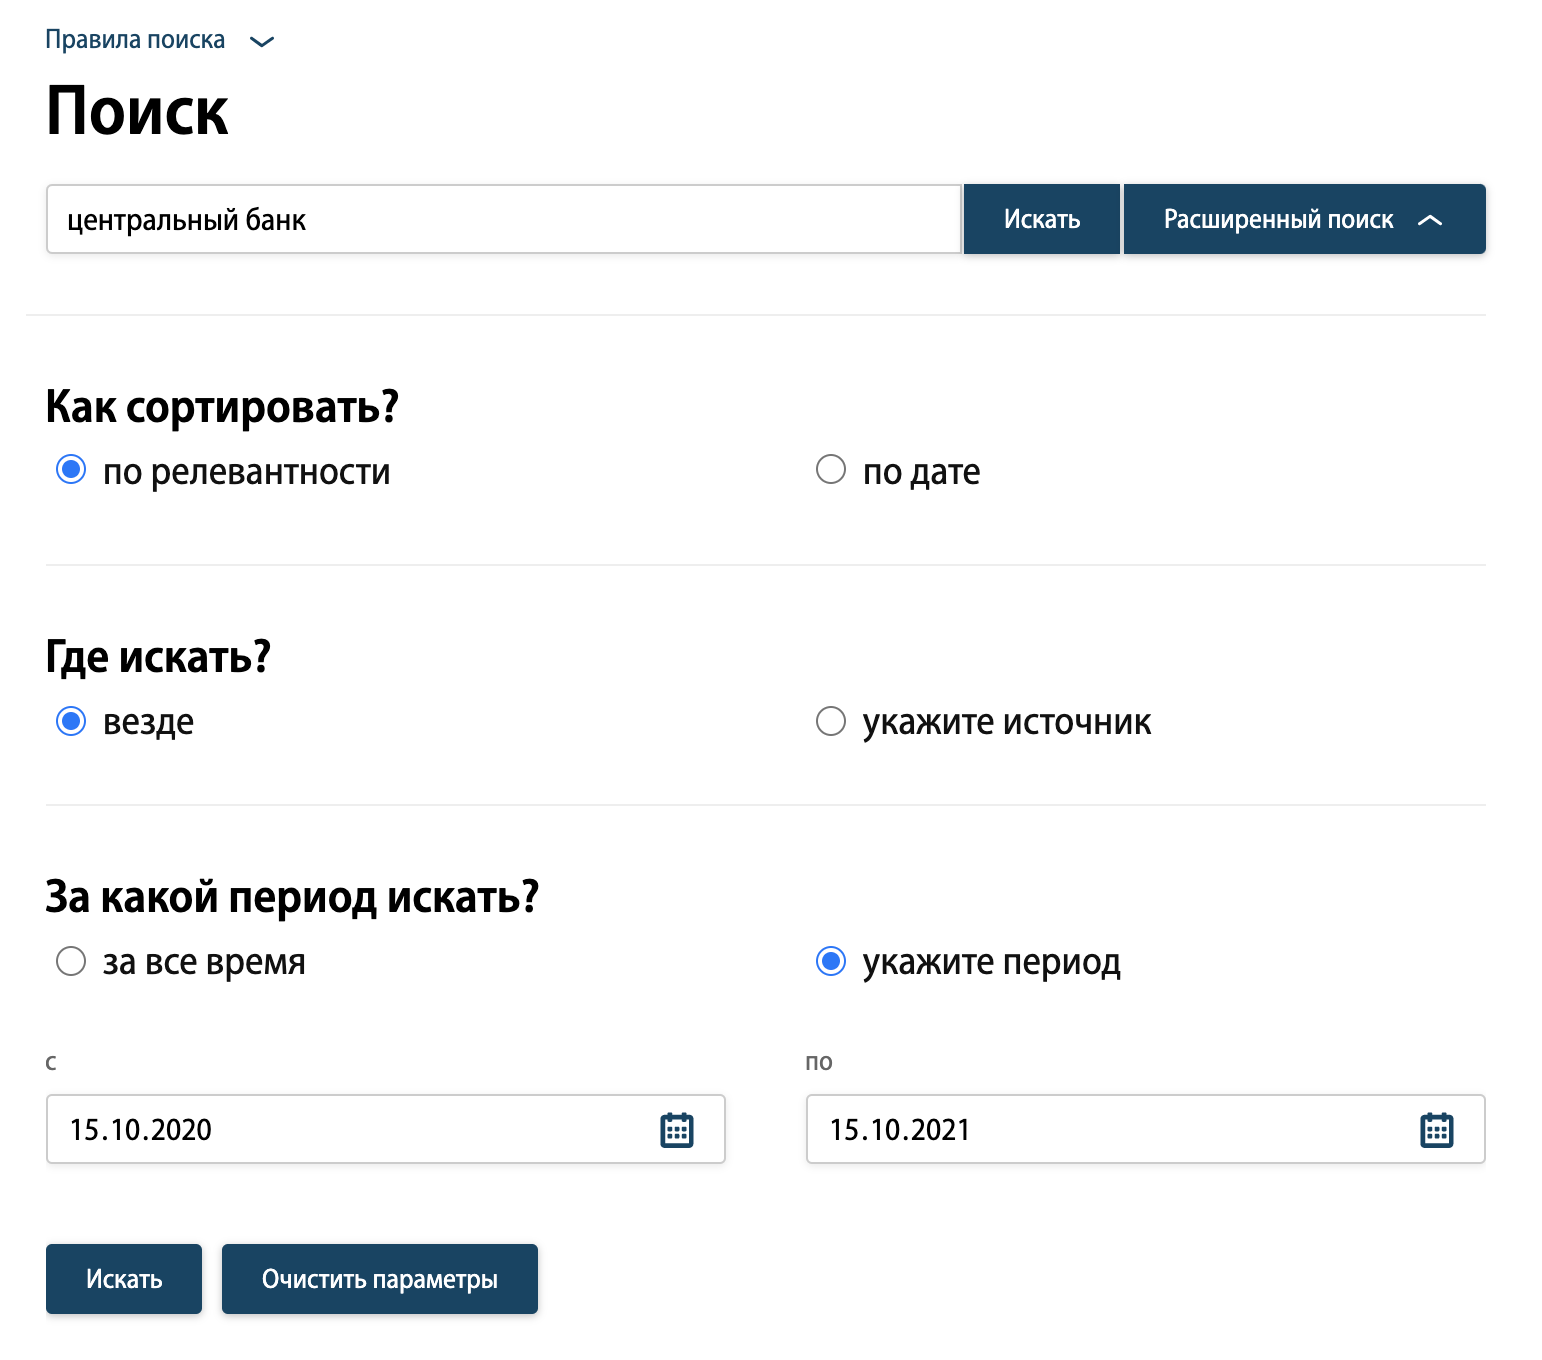

In [150]:
# удаляем введеный по дефолту текст в ячейке
date.send_keys(Keys.SHIFT, Keys.END, Keys.BACK_SPACE)

In [152]:
# вводим нужную дату и надижимаем enter
date_start = "19.10.2023"
date.send_keys(date_start)

In [154]:
date.send_keys(Keys.RETURN)

Ура, получили нужную выдачу! Попробуем перейти на следующую страничку.

In [156]:
# путь к кнопке следующая страница
xpath3 = "/html/body/main/div/div/section/div[1]/div[3]/a"

In [158]:
second_page = driver.find_element(By.XPATH, xpath3)

In [160]:
second_page.click()

Посмотрим на адрес нашей странички:

In [163]:
driver.current_url

'https://www.kommersant.ru/search/results?search_query=%D0%9D%D0%98%D0%A3+%D0%92%D0%A8%D0%AD&sort_type=0&search_full=1&time_range=2&dateStart=2023-10-19&dateEnd=2024-07-10&stamp=638562122781496966&page=2'

In [165]:
# driver.page_source

Обратите внимание на параметр `page=2`. Если мы будем менять номера, то будем перемещаться по всем страницам с заголовками, удовлетворяющим нашим условиям. Осталось написать функцию, которая будет доставать нужную информацию с одной странички, и запустить ее циклом для всех.

Начнем с того, как задать url. Обратите внимание на обратный слэш, это так называемый line continuation character. Он означает, что код продолжится на следующей строке. Также обратите внимание на букву f перед продолжением url-адреса на 3 строчке – она позваоляет мне подставить значение переменной `{page_num}` в середину строки.

In [213]:
page_num = 1
url = 'https://www.kommersant.ru/search/results?search_query='\
        '%D0%9D%D0%98%D0%A3+%D0%92%D0%A8%D0%AD&sort_type=0'\
        '&search_full=1&time_range=2&dateStart=2023-10-19&dateEnd=2024-07-10'\
        f'&page={page_num}'

In [215]:
url

'https://www.kommersant.ru/search/results?search_query=%D0%9D%D0%98%D0%A3+%D0%92%D0%A8%D0%AD&sort_type=0&search_full=1&time_range=2&dateStart=2023-10-19&dateEnd=2024-07-10&page=1'

Как обычно забираем HTML-разметку и делаем деревце бьютифул супом.

In [218]:
response2 = requests.get(url)
response2

<Response [200]>

In [219]:
tree_search = BeautifulSoup(response2.content, 'html.parser')

Уже знакомый по лекциям механизм поиска элемента по html разметке.

In [221]:
# находим заголовки
headers = tree_search.find_all('h2', {'class': 'uho__name rubric_lenta__item_name'})

In [225]:
len(headers)

10

In [227]:
headers[0]

<h2 class="uho__name rubric_lenta__item_name">
<a class="uho__link uho__link--overlay" href="/doc/6821381?query=%D0%9D%D0%98%D0%A3%20%D0%92%D0%A8%D0%AD" target="_blank"><span class="vam">Энергия бьет в землю</span></a>
</h2>

Если достать из тега текст, то можно заметить, что есть пробелы / переходы на новые строки в начале и конце. Метод `.strip()` избавится от них.

In [230]:
headers[0].text

'\nЭнергия бьет в\xa0землю\n'

In [232]:
headers[0].text.strip()

'Энергия бьет в\xa0землю'

In [234]:
# находим подзаголовки
subheaders = tree_search.find_all('h3', \
                {'class': 'uho__subtitle rubric_lenta__item_subtitle'})

In [236]:
len(subheaders)

10

Подзаголовки есть не у всех новостей!

In [239]:
subheaders[0]

<h3 class="uho__subtitle rubric_lenta__item_subtitle">
<a class="uho__link" href="/doc/6821381?query=%D0%9D%D0%98%D0%A3%20%D0%92%D0%A8%D0%AD" target="_blank">ФАС привязывает лимиты льготного потребления для граждан к региональным показателям</a>
</h3>

In [241]:
subheaders[0].text

'\nФАС привязывает лимиты льготного потребления для\xa0граждан к\xa0региональным показателям\n'

In [243]:
subheaders[0].text.strip()

'ФАС привязывает лимиты льготного потребления для\xa0граждан к\xa0региональным показателям'

In [245]:
# напишем функцию, которая будет выдавать список из словарей
# в каждом словаре заголовок и описание
def get_page_info(page_num):
    url = 'https://www.kommersant.ru/search/results?search_query='\
            '%D0%9D%D0%98%D0%A3+%D0%92%D0%A8%D0%AD&sort_type=0'\
            '&search_full=1&time_range=2&dateStart=2023-04-19&dateEnd=2024-04-19'\
            f'&page={page_num}'

    response = requests.get(url)
    tree_search = BeautifulSoup(response.content, 'html.parser')
    headers = tree_search.find_all('h2', \
                                   {'class': 'uho__name rubric_lenta__item_name'})
    subheaders = tree_search.find_all('h3', \
                            {'class': 'uho__subtitle rubric_lenta__item_subtitle'})
    result = []
    for i in range(len(headers)):
        header = headers[i]
        try:
            subheader = subheaders[i]
            d = {'article_header': header.text.strip(),
                 'article_subheader': subheader.text.strip()}
        except:
            d = {'article_header': header.text.strip(),
                 'article_subheader': ''}
        result.append(d)
    return result

In [247]:
all_data = []
for n in range(1, 14):
    all_data.extend(get_page_info(n))

In [248]:
len(all_data)

130

Пока не очень знакомая библиотека сделает табличку из списка и позволит сохранить ее в файл.

In [250]:
import pandas as pd

In [251]:
df = pd.DataFrame(all_data)

In [252]:
df.head()

article_header  \
0         «Метафракс» расширяет сотрудничество с ВШЭ   
1                            Пониженная проходимость   
2  Генетический «мост» между древним и современны...   
3           Россиян массово проверят на фертильность   
4                     Разработки по сниженной ставке   

                                   article_subheader  
0  Сложности с расчетами тормозят поступления от ...  
1  Ученые выяснили, что по нему также прошли скиф...  
2  Минздрав опубликовал рекомендации по проведени...  
3  Эксперты оценили эффективность налоговых льгот...  
4            Что происходит с экономикой Поднебесной

In [253]:
# сохранить в csv формат
# index=False сделает так, чтобы колонка с индексами не вогла в итоговый файл
df.to_csv('all_data.csv', index=False)

In [254]:
# сохранить в xlsx формат
df.to_excel('all_data.xlsx', index=False)

In [255]:
# не забываем закрыть браузер драйвером после завершения работы :)
driver.close()